<a href="https://colab.research.google.com/github/Sabahat-Tufail/EDA/blob/main/EDA_chap_8_python_cookbook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
!pip install contractions
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
import contractions

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [4]:
from google.colab import files
uploaded = files.upload()


Saving European Restaurant Reviews.csv to European Restaurant Reviews (2).csv


In [5]:
df = pd.read_csv("European Restaurant Reviews.csv")

In [6]:
df.head()

,Country,Restaurant Name,Sentiment,Review Title,Review Date,Review
0,France,The Frog at Bercy Village,Negative,Rude manager,May 2024 •,The manager became agressive when I said the c...
1,France,The Frog at Bercy Village,Negative,A big disappointment,Feb 2024 •,"I ordered a beef fillet ask to be done medium,..."
2,France,The Frog at Bercy Village,Negative,Pretty Place with Bland Food,Nov 2023 •,"This is an attractive venue with welcoming, al..."
3,France,The Frog at Bercy Village,Negative,Great service and wine but inedible food,Mar 2023 •,Sadly I used the high TripAdvisor rating too ...
4,France,The Frog at Bercy Village,Negative,Avoid- Worst meal in Rome - possibly ever,Nov 2022 •,From the start this meal was bad- especially g...


In [7]:
df.shape

(1502, 6)

In [8]:
df.dtypes

,0
Country,object
Restaurant Name,object
Sentiment,object
Review Title,object
Review Date,object
Review,object


# Expand contractions
In Natural Language Processing (NLP), contractions are shortened forms of words, like:

don’t → do not

isn’t → is not

can’t → cannot

 So, expanding contractions = converting them into their full forms.
 No_contractions column =  dataset shwoing the text with contractions expanded and then tokenized into words (list format).

In [9]:
df['No_contractions']=df['Review'].apply(lambda x: [contractions.fix(word) for word in x.split()])
df.head()

,Country,Restaurant Name,Sentiment,Review Title,Review Date,Review,No_contractions
0,France,The Frog at Bercy Village,Negative,Rude manager,May 2024 •,The manager became agressive when I said the c...,"[The, manager, became, agressive, when, I, sai..."
1,France,The Frog at Bercy Village,Negative,A big disappointment,Feb 2024 •,"I ordered a beef fillet ask to be done medium,...","[I, ordered, a, beef, fillet, ask, to, be, don..."
2,France,The Frog at Bercy Village,Negative,Pretty Place with Bland Food,Nov 2023 •,"This is an attractive venue with welcoming, al...","[This, is, an, attractive, venue, with, welcom..."
3,France,The Frog at Bercy Village,Negative,Great service and wine but inedible food,Mar 2023 •,Sadly I used the high TripAdvisor rating too ...,"[Sadly, I, used, the, high, TripAdvisor, ratin..."
4,France,The Frog at Bercy Village,Negative,Avoid- Worst meal in Rome - possibly ever,Nov 2022 •,From the start this meal was bad- especially g...,"[From, the, start, this, meal, was, bad-, espe..."


In [10]:
df['Review_no_contractions'] = df['No_contractions'].apply(lambda x: ' '.join(map(str, x)))
df.head()

,Country,Restaurant Name,Sentiment,Review Title,Review Date,Review,No_contractions,Review_no_contractions
0,France,The Frog at Bercy Village,Negative,Rude manager,May 2024 •,The manager became agressive when I said the c...,"[The, manager, became, agressive, when, I, sai...",The manager became agressive when I said the c...
1,France,The Frog at Bercy Village,Negative,A big disappointment,Feb 2024 •,"I ordered a beef fillet ask to be done medium,...","[I, ordered, a, beef, fillet, ask, to, be, don...","I ordered a beef fillet ask to be done medium,..."
2,France,The Frog at Bercy Village,Negative,Pretty Place with Bland Food,Nov 2023 •,"This is an attractive venue with welcoming, al...","[This, is, an, attractive, venue, with, welcom...","This is an attractive venue with welcoming, al..."
3,France,The Frog at Bercy Village,Negative,Great service and wine but inedible food,Mar 2023 •,Sadly I used the high TripAdvisor rating too ...,"[Sadly, I, used, the, high, TripAdvisor, ratin...",Sadly I used the high TripAdvisor rating too l...
4,France,The Frog at Bercy Village,Negative,Avoid- Worst meal in Rome - possibly ever,Nov 2022 •,From the start this meal was bad- especially g...,"[From, the, start, this, meal, was, bad-, espe...",From the start this meal was bad- especially g...


After expansion, we stored two additional representations:

No_contractions (list form): The review is split into individual words, with contractions expanded.

Example: ["I", "did not", "like", "the", "food"]

Review_no_contractions (sentence form): The same review reconstructed into a complete sentence with expanded words.

Example: "I did not like the food"

# Tokenization in NLP

Tokenization = breaking text into smaller units (tokens), usually words or subwords.
But  contractions.fix() can return multiple words (e.g., "did not"), your current list may still contain multi-word strings like "did not" instead of separate tokens "did", "not".

So it’s basic tokenization (space-based) + contraction expansion, but not perfect NLP tokenization.

In [11]:
 nltk.download('punkt_tab')
 df['Review_tokenized']=df['Review_no_contractions'].apply(lambda x: word_tokenize(x))
df.head()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,Country,Restaurant Name,Sentiment,Review Title,Review Date,Review,No_contractions,Review_no_contractions,Review_tokenized
0,France,The Frog at Bercy Village,Negative,Rude manager,May 2024 •,The manager became agressive when I said the c...,"[The, manager, became, agressive, when, I, sai...",The manager became agressive when I said the c...,"[The, manager, became, agressive, when, I, sai..."
1,France,The Frog at Bercy Village,Negative,A big disappointment,Feb 2024 •,"I ordered a beef fillet ask to be done medium,...","[I, ordered, a, beef, fillet, ask, to, be, don...","I ordered a beef fillet ask to be done medium,...","[I, ordered, a, beef, fillet, ask, to, be, don..."
2,France,The Frog at Bercy Village,Negative,Pretty Place with Bland Food,Nov 2023 •,"This is an attractive venue with welcoming, al...","[This, is, an, attractive, venue, with, welcom...","This is an attractive venue with welcoming, al...","[This, is, an, attractive, venue, with, welcom..."
3,France,The Frog at Bercy Village,Negative,Great service and wine but inedible food,Mar 2023 •,Sadly I used the high TripAdvisor rating too ...,"[Sadly, I, used, the, high, TripAdvisor, ratin...",Sadly I used the high TripAdvisor rating too l...,"[Sadly, I, used, the, high, TripAdvisor, ratin..."
4,France,The Frog at Bercy Village,Negative,Avoid- Worst meal in Rome - possibly ever,Nov 2022 •,From the start this meal was bad- especially g...,"[From, the, start, this, meal, was, bad-, espe...",From the start this meal was bad- especially g...,"[From, the, start, this, meal, was, bad-, espe..."


# Convert data to lower case

In [12]:
df['Review_lower']=df['Review_tokenized'].apply(lambda x: [word.lower() for word in x])
df.head()

,Country,Restaurant Name,Sentiment,Review Title,Review Date,Review,No_contractions,Review_no_contractions,Review_tokenized,Review_lower
0,France,The Frog at Bercy Village,Negative,Rude manager,May 2024 •,The manager became agressive when I said the c...,"[The, manager, became, agressive, when, I, sai...",The manager became agressive when I said the c...,"[The, manager, became, agressive, when, I, sai...","[the, manager, became, agressive, when, i, sai..."
1,France,The Frog at Bercy Village,Negative,A big disappointment,Feb 2024 •,"I ordered a beef fillet ask to be done medium,...","[I, ordered, a, beef, fillet, ask, to, be, don...","I ordered a beef fillet ask to be done medium,...","[I, ordered, a, beef, fillet, ask, to, be, don...","[i, ordered, a, beef, fillet, ask, to, be, don..."
2,France,The Frog at Bercy Village,Negative,Pretty Place with Bland Food,Nov 2023 •,"This is an attractive venue with welcoming, al...","[This, is, an, attractive, venue, with, welcom...","This is an attractive venue with welcoming, al...","[This, is, an, attractive, venue, with, welcom...","[this, is, an, attractive, venue, with, welcom..."
3,France,The Frog at Bercy Village,Negative,Great service and wine but inedible food,Mar 2023 •,Sadly I used the high TripAdvisor rating too ...,"[Sadly, I, used, the, high, TripAdvisor, ratin...",Sadly I used the high TripAdvisor rating too l...,"[Sadly, I, used, the, high, TripAdvisor, ratin...","[sadly, i, used, the, high, tripadvisor, ratin..."
4,France,The Frog at Bercy Village,Negative,Avoid- Worst meal in Rome - possibly ever,Nov 2022 •,From the start this meal was bad- especially g...,"[From, the, start, this, meal, was, bad-, espe...",From the start this meal was bad- especially g...,"[From, the, start, this, meal, was, bad-, espe...","[from, the, start, this, meal, was, bad-, espe..."


# Remove punctuations

In [13]:
punctuations = string.punctuation
df['Review_nopunc']=df['Review_lower'].apply(lambda x: [word for word in x if word not in punctuations])
df.head()

,Country,Restaurant Name,Sentiment,Review Title,Review Date,Review,No_contractions,Review_no_contractions,Review_tokenized,Review_lower,Review_nopunc
0,France,The Frog at Bercy Village,Negative,Rude manager,May 2024 •,The manager became agressive when I said the c...,"[The, manager, became, agressive, when, I, sai...",The manager became agressive when I said the c...,"[The, manager, became, agressive, when, I, sai...","[the, manager, became, agressive, when, i, sai...","[the, manager, became, agressive, when, i, sai..."
1,France,The Frog at Bercy Village,Negative,A big disappointment,Feb 2024 •,"I ordered a beef fillet ask to be done medium,...","[I, ordered, a, beef, fillet, ask, to, be, don...","I ordered a beef fillet ask to be done medium,...","[I, ordered, a, beef, fillet, ask, to, be, don...","[i, ordered, a, beef, fillet, ask, to, be, don...","[i, ordered, a, beef, fillet, ask, to, be, don..."
2,France,The Frog at Bercy Village,Negative,Pretty Place with Bland Food,Nov 2023 •,"This is an attractive venue with welcoming, al...","[This, is, an, attractive, venue, with, welcom...","This is an attractive venue with welcoming, al...","[This, is, an, attractive, venue, with, welcom...","[this, is, an, attractive, venue, with, welcom...","[this, is, an, attractive, venue, with, welcom..."
3,France,The Frog at Bercy Village,Negative,Great service and wine but inedible food,Mar 2023 •,Sadly I used the high TripAdvisor rating too ...,"[Sadly, I, used, the, high, TripAdvisor, ratin...",Sadly I used the high TripAdvisor rating too l...,"[Sadly, I, used, the, high, TripAdvisor, ratin...","[sadly, i, used, the, high, tripadvisor, ratin...","[sadly, i, used, the, high, tripadvisor, ratin..."
4,France,The Frog at Bercy Village,Negative,Avoid- Worst meal in Rome - possibly ever,Nov 2022 •,From the start this meal was bad- especially g...,"[From, the, start, this, meal, was, bad-, espe...",From the start this meal was bad- especially g...,"[From, the, start, this, meal, was, bad-, espe...","[from, the, start, this, meal, was, bad-, espe...","[from, the, start, this, meal, was, bad-, espe..."


# Convert output back to string

In [14]:
df['Review_cleaned']=[' '.join(map(str, l)) for l in df['Review_nopunc']]
df.head()

,Country,Restaurant Name,Sentiment,Review Title,Review Date,Review,No_contractions,Review_no_contractions,Review_tokenized,Review_lower,Review_nopunc,Review_cleaned
0,France,The Frog at Bercy Village,Negative,Rude manager,May 2024 •,The manager became agressive when I said the c...,"[The, manager, became, agressive, when, I, sai...",The manager became agressive when I said the c...,"[The, manager, became, agressive, when, I, sai...","[the, manager, became, agressive, when, i, sai...","[the, manager, became, agressive, when, i, sai...",the manager became agressive when i said the c...
1,France,The Frog at Bercy Village,Negative,A big disappointment,Feb 2024 •,"I ordered a beef fillet ask to be done medium,...","[I, ordered, a, beef, fillet, ask, to, be, don...","I ordered a beef fillet ask to be done medium,...","[I, ordered, a, beef, fillet, ask, to, be, don...","[i, ordered, a, beef, fillet, ask, to, be, don...","[i, ordered, a, beef, fillet, ask, to, be, don...",i ordered a beef fillet ask to be done medium ...
2,France,The Frog at Bercy Village,Negative,Pretty Place with Bland Food,Nov 2023 •,"This is an attractive venue with welcoming, al...","[This, is, an, attractive, venue, with, welcom...","This is an attractive venue with welcoming, al...","[This, is, an, attractive, venue, with, welcom...","[this, is, an, attractive, venue, with, welcom...","[this, is, an, attractive, venue, with, welcom...",this is an attractive venue with welcoming alb...
3,France,The Frog at Bercy Village,Negative,Great service and wine but inedible food,Mar 2023 •,Sadly I used the high TripAdvisor rating too ...,"[Sadly, I, used, the, high, TripAdvisor, ratin...",Sadly I used the high TripAdvisor rating too l...,"[Sadly, I, used, the, high, TripAdvisor, ratin...","[sadly, i, used, the, high, tripadvisor, ratin...","[sadly, i, used, the, high, tripadvisor, ratin...",sadly i used the high tripadvisor rating too l...
4,France,The Frog at Bercy Village,Negative,Avoid- Worst meal in Rome - possibly ever,Nov 2022 •,From the start this meal was bad- especially g...,"[From, the, start, this, meal, was, bad-, espe...",From the start this meal was bad- especially g...,"[From, the, start, this, meal, was, bad-, espe...","[from, the, start, this, meal, was, bad-, espe...","[from, the, start, this, meal, was, bad-, espe...",from the start this meal was bad- especially g...


# Export Cleaned Text data

In [15]:
df[['Review','Sentiment','Review_cleaned']].to_csv('cleaned_reviews.csv', index=False)

In [16]:
df.head()

,Country,Restaurant Name,Sentiment,Review Title,Review Date,Review,No_contractions,Review_no_contractions,Review_tokenized,Review_lower,Review_nopunc,Review_cleaned
0,France,The Frog at Bercy Village,Negative,Rude manager,May 2024 •,The manager became agressive when I said the c...,"[The, manager, became, agressive, when, I, sai...",The manager became agressive when I said the c...,"[The, manager, became, agressive, when, I, sai...","[the, manager, became, agressive, when, i, sai...","[the, manager, became, agressive, when, i, sai...",the manager became agressive when i said the c...
1,France,The Frog at Bercy Village,Negative,A big disappointment,Feb 2024 •,"I ordered a beef fillet ask to be done medium,...","[I, ordered, a, beef, fillet, ask, to, be, don...","I ordered a beef fillet ask to be done medium,...","[I, ordered, a, beef, fillet, ask, to, be, don...","[i, ordered, a, beef, fillet, ask, to, be, don...","[i, ordered, a, beef, fillet, ask, to, be, don...",i ordered a beef fillet ask to be done medium ...
2,France,The Frog at Bercy Village,Negative,Pretty Place with Bland Food,Nov 2023 •,"This is an attractive venue with welcoming, al...","[This, is, an, attractive, venue, with, welcom...","This is an attractive venue with welcoming, al...","[This, is, an, attractive, venue, with, welcom...","[this, is, an, attractive, venue, with, welcom...","[this, is, an, attractive, venue, with, welcom...",this is an attractive venue with welcoming alb...
3,France,The Frog at Bercy Village,Negative,Great service and wine but inedible food,Mar 2023 •,Sadly I used the high TripAdvisor rating too ...,"[Sadly, I, used, the, high, TripAdvisor, ratin...",Sadly I used the high TripAdvisor rating too l...,"[Sadly, I, used, the, high, TripAdvisor, ratin...","[sadly, i, used, the, high, tripadvisor, ratin...","[sadly, i, used, the, high, tripadvisor, ratin...",sadly i used the high tripadvisor rating too l...
4,France,The Frog at Bercy Village,Negative,Avoid- Worst meal in Rome - possibly ever,Nov 2022 •,From the start this meal was bad- especially g...,"[From, the, start, this, meal, was, bad-, espe...",From the start this meal was bad- especially g...,"[From, the, start, this, meal, was, bad-, espe...","[from, the, start, this, meal, was, bad-, espe...","[from, the, start, this, meal, was, bad-, espe...",from the start this meal was bad- especially g...


In [17]:
df2=pd.read_csv('cleaned_reviews.csv')

In [18]:
df2.head()

,Review,Sentiment,Review_cleaned
0,The manager became agressive when I said the c...,Negative,the manager became agressive when i said the c...
1,"I ordered a beef fillet ask to be done medium,...",Negative,i ordered a beef fillet ask to be done medium ...
2,"This is an attractive venue with welcoming, al...",Negative,this is an attractive venue with welcoming alb...
3,Sadly I used the high TripAdvisor rating too ...,Negative,sadly i used the high tripadvisor rating too l...
4,From the start this meal was bad- especially g...,Negative,from the start this meal was bad- especially g...


# Tokenzie data

In [19]:
df2['Reviews_tokenized']=df2['Review_cleaned'].apply(lambda x: word_tokenize(x))
df2.head()

,Review,Sentiment,Review_cleaned,Reviews_tokenized
0,The manager became agressive when I said the c...,Negative,the manager became agressive when i said the c...,"[the, manager, became, agressive, when, i, sai..."
1,"I ordered a beef fillet ask to be done medium,...",Negative,i ordered a beef fillet ask to be done medium ...,"[i, ordered, a, beef, fillet, ask, to, be, don..."
2,"This is an attractive venue with welcoming, al...",Negative,this is an attractive venue with welcoming alb...,"[this, is, an, attractive, venue, with, welcom..."
3,Sadly I used the high TripAdvisor rating too ...,Negative,sadly i used the high tripadvisor rating too l...,"[sadly, i, used, the, high, tripadvisor, ratin..."
4,From the start this meal was bad- especially g...,Negative,from the start this meal was bad- especially g...,"[from, the, start, this, meal, was, bad-, espe..."


# Visualise most common words

What happens: Takes all the tokenized reviews and puts every single word into one big list.

Example:
[['the','food','was','bad'], ['the','service','was','great']]
→ ['the','food','was','bad','the','service','was','great']

Now all words across all reviews in a single place.

In [20]:
def combine_words(word_list):
    all_words = []
    for word in word_list:
        all_words += word
    return all_words

In [21]:
def count_topwords(all_words):
    counts = dict()
    for word in all_words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    word_count = pd.DataFrame([counts])
    word_count_transposed = word_count.T.reset_index()
    word_count_transposed.columns = ['words','word_count']
    word_count_sorted = word_count_transposed.sort_values("word_count",ascending = False)
    word_count_sorted
    return word_count_sorted[:20]

In [22]:
reviews=df2['Reviews_tokenized']
all_words=combine_words(reviews)
all_words[:13]

['the',
 'manager',
 'became',
 'agressive',
 'when',
 'i',
 'said',
 'the',
 'carbonara',
 'was',
 'not',
 'good',
 'she']

In [23]:
review_topwords=count_topwords(all_words)
review_topwords

,words,word_count
0,the,5568
34,and,4084
14,a,2680
8,was,2269
27,to,2192
98,we,2007
105,of,1724
5,i,1368
19,in,1329
89,for,1251


# A bar chart is drawn showing the top 20 most common words in reviews.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'the'),
  Text(1, 0, 'and'),
  Text(2, 0, 'a'),
  Text(3, 0, 'was'),
  Text(4, 0, 'to'),
  Text(5, 0, 'we'),
  Text(6, 0, 'of'),
  Text(7, 0, 'i'),
  Text(8, 0, 'in'),
  Text(9, 0, 'for'),
  Text(10, 0, 'is'),
  Text(11, 0, 'it'),
  Text(12, 0, 'with'),
  Text(13, 0, 'food'),
  Text(14, 0, 'were'),
  Text(15, 0, 'not'),
  Text(16, 0, 'very'),
  Text(17, 0, 'had'),
  Text(18, 0, 'this'),
  Text(19, 0, 'our')])

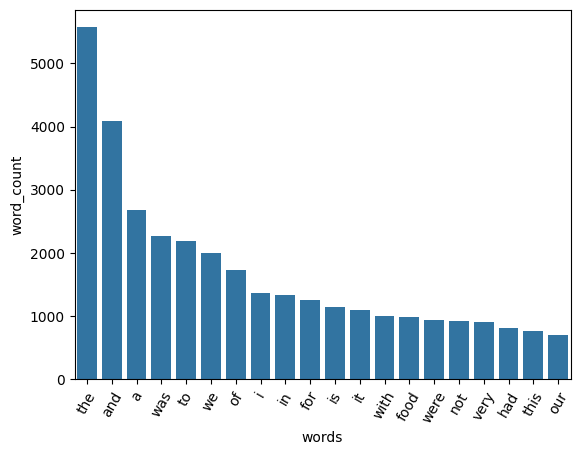

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x='words',y='word_count',data=review_topwords)
plt.xticks(rotation=60)

Split each review into words (so the computer can analyze them).

Collected all words from every review into one big list.

Counted which words appear the most.

Plotted a chart so you can visually see the most common words used by customers in their reviews.

What are Stopwords?

Stopwords are common words in a language that usually don’t carry much meaning and are often removed from text before analysis.

Examples in English:

Articles → "a", "an", "the"

Prepositions → "in", "on", "at"

Pronouns → "he", "she", "it"

Conjunctions → "and", "but", "or"

 For example:

Original sentence: "I am going to the market"

Without stopwords: "going market

In [25]:
nltk.download('stopwords')
stopwords=stopwords.words('english')
df2['Review_nostopwords']=df2['Reviews_tokenized'].apply(lambda x: [word for word in x if word not in stopwords])
df2.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Review,Sentiment,Review_cleaned,Reviews_tokenized,Review_nostopwords
0,The manager became agressive when I said the c...,Negative,the manager became agressive when i said the c...,"[the, manager, became, agressive, when, i, sai...","[manager, became, agressive, said, carbonara, ..."
1,"I ordered a beef fillet ask to be done medium,...",Negative,i ordered a beef fillet ask to be done medium ...,"[i, ordered, a, beef, fillet, ask, to, be, don...","[ordered, beef, fillet, ask, done, medium, got..."
2,"This is an attractive venue with welcoming, al...",Negative,this is an attractive venue with welcoming alb...,"[this, is, an, attractive, venue, with, welcom...","[attractive, venue, welcoming, albeit, somewha..."
3,Sadly I used the high TripAdvisor rating too ...,Negative,sadly i used the high tripadvisor rating too l...,"[sadly, i, used, the, high, tripadvisor, ratin...","[sadly, used, high, tripadvisor, rating, liter..."
4,From the start this meal was bad- especially g...,Negative,from the start this meal was bad- especially g...,"[from, the, start, this, meal, was, bad-, espe...","[start, meal, bad-, especially, given, price, ..."


In [26]:
df2['Review_cleaned_stopwords'] = [' '.join(l) for l in df2['Review_nostopwords']]
df2.head()

,Review,Sentiment,Review_cleaned,Reviews_tokenized,Review_nostopwords,Review_cleaned_stopwords
0,The manager became agressive when I said the c...,Negative,the manager became agressive when i said the c...,"[the, manager, became, agressive, when, i, sai...","[manager, became, agressive, said, carbonara, ...",manager became agressive said carbonara good r...
1,"I ordered a beef fillet ask to be done medium,...",Negative,i ordered a beef fillet ask to be done medium ...,"[i, ordered, a, beef, fillet, ask, to, be, don...","[ordered, beef, fillet, ask, done, medium, got...",ordered beef fillet ask done medium got well d...
2,"This is an attractive venue with welcoming, al...",Negative,this is an attractive venue with welcoming alb...,"[this, is, an, attractive, venue, with, welcom...","[attractive, venue, welcoming, albeit, somewha...",attractive venue welcoming albeit somewhat slo...
3,Sadly I used the high TripAdvisor rating too ...,Negative,sadly i used the high tripadvisor rating too l...,"[sadly, i, used, the, high, tripadvisor, ratin...","[sadly, used, high, tripadvisor, rating, liter...",sadly used high tripadvisor rating literally f...
4,From the start this meal was bad- especially g...,Negative,from the start this meal was bad- especially g...,"[from, the, start, this, meal, was, bad-, espe...","[start, meal, bad-, especially, given, price, ...",start meal bad- especially given price visited...


In [27]:
reviews_no_stopwords=df2['Review_nostopwords']
all_words_no_stopwords=combine_words(reviews_no_stopwords)
review_topwords_no_stopwords=count_topwords(all_words_no_stopwords)
review_topwords_no_stopwords.head(10)

,words,word_count
57,food,986
43,service,684
5,good,665
74,great,623
55,restaurant,537
157,place,471
187,us,421
123,wine,414
144,nice,394
79,menu,366


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'food'),
  Text(1, 0, 'service'),
  Text(2, 0, 'good'),
  Text(3, 0, 'great'),
  Text(4, 0, 'restaurant'),
  Text(5, 0, 'place'),
  Text(6, 0, 'us'),
  Text(7, 0, 'wine'),
  Text(8, 0, 'nice'),
  Text(9, 0, 'menu'),
  Text(10, 0, 'would'),
  Text(11, 0, 'really'),
  Text(12, 0, 'staff'),
  Text(13, 0, 'one'),
  Text(14, 0, 'rome'),
  Text(15, 0, 'time'),
  Text(16, 0, 'friendly'),
  Text(17, 0, 'excellent'),
  Text(18, 0, 'delicious'),
  Text(19, 0, 'well')])

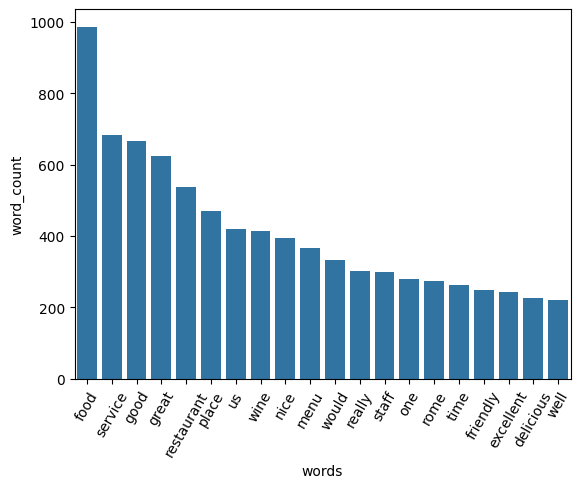

In [28]:
sns.barplot(x='words',y='word_count',data=review_topwords_no_stopwords)
plt.xticks(rotation=60)

# Cleaned Data Exported

In [29]:
df2[['Review','Sentiment','Review_cleaned','Review_cleaned_stopwords']].to_csv('cleaned_reviews.csv', index=False)

# **3. Analysing Part of Speech**

In [30]:
from nltk import pos_tag

In [31]:
df3=pd.read_csv('cleaned_reviews.csv')

In [32]:
df3.head()

,Review,Sentiment,Review_cleaned,Review_cleaned_stopwords
0,The manager became agressive when I said the c...,Negative,the manager became agressive when i said the c...,manager became agressive said carbonara good r...
1,"I ordered a beef fillet ask to be done medium,...",Negative,i ordered a beef fillet ask to be done medium ...,ordered beef fillet ask done medium got well d...
2,"This is an attractive venue with welcoming, al...",Negative,this is an attractive venue with welcoming alb...,attractive venue welcoming albeit somewhat slo...
3,Sadly I used the high TripAdvisor rating too ...,Negative,sadly i used the high tripadvisor rating too l...,sadly used high tripadvisor rating literally f...
4,From the start this meal was bad- especially g...,Negative,from the start this meal was bad- especially g...,start meal bad- especially given price visited...


# Tokenizing

In [33]:
df3['Review_tokenized']=df3['Review_cleaned_stopwords'].apply(word_tokenize)
df3.head()

,Review,Sentiment,Review_cleaned,Review_cleaned_stopwords,Review_tokenized
0,The manager became agressive when I said the c...,Negative,the manager became agressive when i said the c...,manager became agressive said carbonara good r...,"[manager, became, agressive, said, carbonara, ..."
1,"I ordered a beef fillet ask to be done medium,...",Negative,i ordered a beef fillet ask to be done medium ...,ordered beef fillet ask done medium got well d...,"[ordered, beef, fillet, ask, done, medium, got..."
2,"This is an attractive venue with welcoming, al...",Negative,this is an attractive venue with welcoming alb...,attractive venue welcoming albeit somewhat slo...,"[attractive, venue, welcoming, albeit, somewha..."
3,Sadly I used the high TripAdvisor rating too ...,Negative,sadly i used the high tripadvisor rating too l...,sadly used high tripadvisor rating literally f...,"[sadly, used, high, tripadvisor, rating, liter..."
4,From the start this meal was bad- especially g...,Negative,from the start this meal was bad- especially g...,start meal bad- especially given price visited...,"[start, meal, bad-, especially, given, price, ..."


# Perform Part of Speech tagging

In [34]:
nltk.download('averaged_perceptron_tagger_eng')
df3['POS']=df3['Review_tokenized'].apply(nltk.tag.pos_tag)
df3.head()

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


,Review,Sentiment,Review_cleaned,Review_cleaned_stopwords,Review_tokenized,POS
0,The manager became agressive when I said the c...,Negative,the manager became agressive when i said the c...,manager became agressive said carbonara good r...,"[manager, became, agressive, said, carbonara, ...","[(manager, NN), (became, VBD), (agressive, JJ)..."
1,"I ordered a beef fillet ask to be done medium,...",Negative,i ordered a beef fillet ask to be done medium ...,ordered beef fillet ask done medium got well d...,"[ordered, beef, fillet, ask, done, medium, got...","[(ordered, VBN), (beef, NN), (fillet, NN), (as..."
2,"This is an attractive venue with welcoming, al...",Negative,this is an attractive venue with welcoming alb...,attractive venue welcoming albeit somewhat slo...,"[attractive, venue, welcoming, albeit, somewha...","[(attractive, JJ), (venue, NN), (welcoming, VB..."
3,Sadly I used the high TripAdvisor rating too ...,Negative,sadly i used the high tripadvisor rating too l...,sadly used high tripadvisor rating literally f...,"[sadly, used, high, tripadvisor, rating, liter...","[(sadly, RB), (used, VBN), (high, JJ), (tripad..."
4,From the start this meal was bad- especially g...,Negative,from the start this meal was bad- especially g...,start meal bad- especially given price visited...,"[start, meal, bad-, especially, given, price, ...","[(start, JJ), (meal, VB), (bad-, JJ), (especia..."


In [35]:
df3['Review_adj'] = df3['POS'].apply(lambda x: [word for (word, pos_tag) in x if pos_tag == 'JJ'])
df3.head()


,Review,Sentiment,Review_cleaned,Review_cleaned_stopwords,Review_tokenized,POS,Review_adj
0,The manager became agressive when I said the c...,Negative,the manager became agressive when i said the c...,manager became agressive said carbonara good r...,"[manager, became, agressive, said, carbonara, ...","[(manager, NN), (became, VBD), (agressive, JJ)...","[agressive, good, bad, many]"
1,"I ordered a beef fillet ask to be done medium,...",Negative,i ordered a beef fillet ask to be done medium ...,ordered beef fillet ask done medium got well d...,"[ordered, beef, fillet, ask, done, medium, got...","[(ordered, VBN), (beef, NN), (fillet, NN), (as...","[dry, rare, charged]"
2,"This is an attractive venue with welcoming, al...",Negative,this is an attractive venue with welcoming alb...,attractive venue welcoming albeit somewhat slo...,"[attractive, venue, welcoming, albeit, somewha...","[(attractive, JJ), (venue, NN), (welcoming, VB...","[attractive, slow, restaurant]"
3,Sadly I used the high TripAdvisor rating too ...,Negative,sadly i used the high tripadvisor rating too l...,sadly used high tripadvisor rating literally f...,"[sadly, used, high, tripadvisor, rating, liter...","[(sadly, RB), (used, VBN), (high, JJ), (tripad...","[high, fortunate, fine, mouthful, fine, great,..."
4,From the start this meal was bad- especially g...,Negative,from the start this meal was bad- especially g...,start meal bad- especially given price visited...,"[start, meal, bad-, especially, given, price, ...","[(start, JJ), (meal, VB), (bad-, JJ), (especia...","[start, bad-, local, lady, table, up-sell, tab..."


### This will create a new column Review_adj that only keeps the adjectives (JJ) from your POS-tagged data.

In [36]:
review_count=df3['Review_adj']
review_words=combine_words(review_count)
review_adj=count_topwords(review_words)
review_adj.head(10)

,words,word_count
1,good,648
14,great,623
66,nice,341
124,delicious,226
174,excellent,197
16,friendly,163
39,table,147
3,many,135
30,wine,131
133,small,112


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'good'),
  Text(1, 0, 'great'),
  Text(2, 0, 'nice'),
  Text(3, 0, 'delicious'),
  Text(4, 0, 'excellent'),
  Text(5, 0, 'friendly'),
  Text(6, 0, 'table'),
  Text(7, 0, 'many'),
  Text(8, 0, 'wine'),
  Text(9, 0, 'small'),
  Text(10, 0, 'wonderful'),
  Text(11, 0, 'special'),
  Text(12, 0, 'little'),
  Text(13, 0, 'restaurant'),
  Text(14, 0, 'main'),
  Text(15, 0, 'fresh'),
  Text(16, 0, 'next'),
  Text(17, 0, 'old'),
  Text(18, 0, 'fantastic'),
  Text(19, 0, 'rome')])

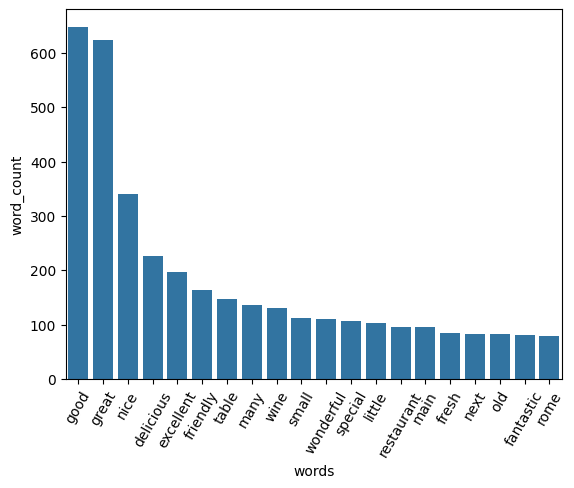

In [37]:
sns.barplot(x='words',y='word_count',data=review_adj)
plt.xticks(rotation=60)

# 4. Performing Stemming and Lemmatisation

In [38]:
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [39]:
df3.head()

,Review,Sentiment,Review_cleaned,Review_cleaned_stopwords,Review_tokenized,POS,Review_adj
0,The manager became agressive when I said the c...,Negative,the manager became agressive when i said the c...,manager became agressive said carbonara good r...,"[manager, became, agressive, said, carbonara, ...","[(manager, NN), (became, VBD), (agressive, JJ)...","[agressive, good, bad, many]"
1,"I ordered a beef fillet ask to be done medium,...",Negative,i ordered a beef fillet ask to be done medium ...,ordered beef fillet ask done medium got well d...,"[ordered, beef, fillet, ask, done, medium, got...","[(ordered, VBN), (beef, NN), (fillet, NN), (as...","[dry, rare, charged]"
2,"This is an attractive venue with welcoming, al...",Negative,this is an attractive venue with welcoming alb...,attractive venue welcoming albeit somewhat slo...,"[attractive, venue, welcoming, albeit, somewha...","[(attractive, JJ), (venue, NN), (welcoming, VB...","[attractive, slow, restaurant]"
3,Sadly I used the high TripAdvisor rating too ...,Negative,sadly i used the high tripadvisor rating too l...,sadly used high tripadvisor rating literally f...,"[sadly, used, high, tripadvisor, rating, liter...","[(sadly, RB), (used, VBN), (high, JJ), (tripad...","[high, fortunate, fine, mouthful, fine, great,..."
4,From the start this meal was bad- especially g...,Negative,from the start this meal was bad- especially g...,start meal bad- especially given price visited...,"[start, meal, bad-, especially, given, price, ...","[(start, JJ), (meal, VB), (bad-, JJ), (especia...","[start, bad-, local, lady, table, up-sell, tab..."


# Perform Stemming
Stemming is a text preprocessing technique used in Natural Language Processing (NLP) to reduce words to their root/base form. The idea is to remove suffixes and prefixes so that different forms of a word are treated as the same word.

In [40]:
stemmer=nltk.PorterStemmer()
df3['Review_stemmed']=df3['Review_tokenized'].apply(lambda x: [stemmer.stem(word) for word in x])
df3.head()

,Review,Sentiment,Review_cleaned,Review_cleaned_stopwords,Review_tokenized,POS,Review_adj,Review_stemmed
0,The manager became agressive when I said the c...,Negative,the manager became agressive when i said the c...,manager became agressive said carbonara good r...,"[manager, became, agressive, said, carbonara, ...","[(manager, NN), (became, VBD), (agressive, JJ)...","[agressive, good, bad, many]","[manag, becam, agress, said, carbonara, good, ..."
1,"I ordered a beef fillet ask to be done medium,...",Negative,i ordered a beef fillet ask to be done medium ...,ordered beef fillet ask done medium got well d...,"[ordered, beef, fillet, ask, done, medium, got...","[(ordered, VBN), (beef, NN), (fillet, NN), (as...","[dry, rare, charged]","[order, beef, fillet, ask, done, medium, got, ..."
2,"This is an attractive venue with welcoming, al...",Negative,this is an attractive venue with welcoming alb...,attractive venue welcoming albeit somewhat slo...,"[attractive, venue, welcoming, albeit, somewha...","[(attractive, JJ), (venue, NN), (welcoming, VB...","[attractive, slow, restaurant]","[attract, venu, welcom, albeit, somewhat, slow..."
3,Sadly I used the high TripAdvisor rating too ...,Negative,sadly i used the high tripadvisor rating too l...,sadly used high tripadvisor rating literally f...,"[sadly, used, high, tripadvisor, rating, liter...","[(sadly, RB), (used, VBN), (high, JJ), (tripad...","[high, fortunate, fine, mouthful, fine, great,...","[sadli, use, high, tripadvisor, rate, liter, f..."
4,From the start this meal was bad- especially g...,Negative,from the start this meal was bad- especially g...,start meal bad- especially given price visited...,"[start, meal, bad-, especially, given, price, ...","[(start, JJ), (meal, VB), (bad-, JJ), (especia...","[start, bad-, local, lady, table, up-sell, tab...","[start, meal, bad-, especi, given, price, visi..."


# Perform Lemmatization

In [41]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN



additional tagging function is just a translator between Treebank POS tags and WordNet POS tags, making lemmatization more accurate.

In [42]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [43]:
df3['wordnet_pos'] = df3['POS'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
df3.head()

,Review,Sentiment,Review_cleaned,Review_cleaned_stopwords,Review_tokenized,POS,Review_adj,Review_stemmed,wordnet_pos
0,The manager became agressive when I said the c...,Negative,the manager became agressive when i said the c...,manager became agressive said carbonara good r...,"[manager, became, agressive, said, carbonara, ...","[(manager, NN), (became, VBD), (agressive, JJ)...","[agressive, good, bad, many]","[manag, becam, agress, said, carbonara, good, ...","[(manager, n), (became, v), (agressive, a), (s..."
1,"I ordered a beef fillet ask to be done medium,...",Negative,i ordered a beef fillet ask to be done medium ...,ordered beef fillet ask done medium got well d...,"[ordered, beef, fillet, ask, done, medium, got...","[(ordered, VBN), (beef, NN), (fillet, NN), (as...","[dry, rare, charged]","[order, beef, fillet, ask, done, medium, got, ...","[(ordered, v), (beef, n), (fillet, n), (ask, v..."
2,"This is an attractive venue with welcoming, al...",Negative,this is an attractive venue with welcoming alb...,attractive venue welcoming albeit somewhat slo...,"[attractive, venue, welcoming, albeit, somewha...","[(attractive, JJ), (venue, NN), (welcoming, VB...","[attractive, slow, restaurant]","[attract, venu, welcom, albeit, somewhat, slow...","[(attractive, a), (venue, n), (welcoming, v), ..."
3,Sadly I used the high TripAdvisor rating too ...,Negative,sadly i used the high tripadvisor rating too l...,sadly used high tripadvisor rating literally f...,"[sadly, used, high, tripadvisor, rating, liter...","[(sadly, RB), (used, VBN), (high, JJ), (tripad...","[high, fortunate, fine, mouthful, fine, great,...","[sadli, use, high, tripadvisor, rate, liter, f...","[(sadly, r), (used, v), (high, a), (tripadviso..."
4,From the start this meal was bad- especially g...,Negative,from the start this meal was bad- especially g...,start meal bad- especially given price visited...,"[start, meal, bad-, especially, given, price, ...","[(start, JJ), (meal, VB), (bad-, JJ), (especia...","[start, bad-, local, lady, table, up-sell, tab...","[start, meal, bad-, especi, given, price, visi...","[(start, a), (meal, v), (bad-, a), (especially..."


In [44]:
lemmatizer=WordNetLemmatizer()
df3['Review_lemmatized']=df3['wordnet_pos'].apply(lambda x: [lemmatizer.lemmatize(word,tag) for word,tag in x])
df3.head()

,Review,Sentiment,Review_cleaned,Review_cleaned_stopwords,Review_tokenized,POS,Review_adj,Review_stemmed,wordnet_pos,Review_lemmatized
0,The manager became agressive when I said the c...,Negative,the manager became agressive when i said the c...,manager became agressive said carbonara good r...,"[manager, became, agressive, said, carbonara, ...","[(manager, NN), (became, VBD), (agressive, JJ)...","[agressive, good, bad, many]","[manag, becam, agress, said, carbonara, good, ...","[(manager, n), (became, v), (agressive, a), (s...","[manager, become, agressive, say, carbonara, g..."
1,"I ordered a beef fillet ask to be done medium,...",Negative,i ordered a beef fillet ask to be done medium ...,ordered beef fillet ask done medium got well d...,"[ordered, beef, fillet, ask, done, medium, got...","[(ordered, VBN), (beef, NN), (fillet, NN), (as...","[dry, rare, charged]","[order, beef, fillet, ask, done, medium, got, ...","[(ordered, v), (beef, n), (fillet, n), (ask, v...","[order, beef, fillet, ask, do, medium, get, we..."
2,"This is an attractive venue with welcoming, al...",Negative,this is an attractive venue with welcoming alb...,attractive venue welcoming albeit somewhat slo...,"[attractive, venue, welcoming, albeit, somewha...","[(attractive, JJ), (venue, NN), (welcoming, VB...","[attractive, slow, restaurant]","[attract, venu, welcom, albeit, somewhat, slow...","[(attractive, a), (venue, n), (welcoming, v), ...","[attractive, venue, welcome, albeit, somewhat,..."
3,Sadly I used the high TripAdvisor rating too ...,Negative,sadly i used the high tripadvisor rating too l...,sadly used high tripadvisor rating literally f...,"[sadly, used, high, tripadvisor, rating, liter...","[(sadly, RB), (used, VBN), (high, JJ), (tripad...","[high, fortunate, fine, mouthful, fine, great,...","[sadli, use, high, tripadvisor, rate, liter, f...","[(sadly, r), (used, v), (high, a), (tripadviso...","[sadly, use, high, tripadvisor, rating, litera..."
4,From the start this meal was bad- especially g...,Negative,from the start this meal was bad- especially g...,start meal bad- especially given price visited...,"[start, meal, bad-, especially, given, price, ...","[(start, JJ), (meal, VB), (bad-, JJ), (especia...","[start, bad-, local, lady, table, up-sell, tab...","[start, meal, bad-, especi, given, price, visi...","[(start, a), (meal, v), (bad-, a), (especially...","[start, meal, bad-, especially, give, price, v..."


Explanation of Lemmatization Step

First, we created a helper function get_wordnet_pos to convert the POS tags (like NN, VB, JJ) into a format that WordNet’s lemmatizer understands (NOUN, VERB, ADJ, ADV).

Then, we added a new column wordnet_pos which stores each word along with its simplified POS tag.

Finally, we applied WordNetLemmatizer to each word using its correct POS.

Example: “running” (Verb) → “run”, “better” (Adjective) → “good”.

This ensures words are reduced to their true dictionary form (lemmas), which is more accurate than stemming.

In [45]:
df3['Review_cleaned_lemmatized'] = [' '.join(l) for l in df3['Review_lemmatized']]
df3.head()

,Review,Sentiment,Review_cleaned,Review_cleaned_stopwords,Review_tokenized,POS,Review_adj,Review_stemmed,wordnet_pos,Review_lemmatized,Review_cleaned_lemmatized
0,The manager became agressive when I said the c...,Negative,the manager became agressive when i said the c...,manager became agressive said carbonara good r...,"[manager, became, agressive, said, carbonara, ...","[(manager, NN), (became, VBD), (agressive, JJ)...","[agressive, good, bad, many]","[manag, becam, agress, said, carbonara, good, ...","[(manager, n), (became, v), (agressive, a), (s...","[manager, become, agressive, say, carbonara, g...",manager become agressive say carbonara good ru...
1,"I ordered a beef fillet ask to be done medium,...",Negative,i ordered a beef fillet ask to be done medium ...,ordered beef fillet ask done medium got well d...,"[ordered, beef, fillet, ask, done, medium, got...","[(ordered, VBN), (beef, NN), (fillet, NN), (as...","[dry, rare, charged]","[order, beef, fillet, ask, done, medium, got, ...","[(ordered, v), (beef, n), (fillet, n), (ask, v...","[order, beef, fillet, ask, do, medium, get, we...",order beef fillet ask do medium get well do co...
2,"This is an attractive venue with welcoming, al...",Negative,this is an attractive venue with welcoming alb...,attractive venue welcoming albeit somewhat slo...,"[attractive, venue, welcoming, albeit, somewha...","[(attractive, JJ), (venue, NN), (welcoming, VB...","[attractive, slow, restaurant]","[attract, venu, welcom, albeit, somewhat, slow...","[(attractive, a), (venue, n), (welcoming, v), ...","[attractive, venue, welcome, albeit, somewhat,...",attractive venue welcome albeit somewhat slow ...
3,Sadly I used the high TripAdvisor rating too ...,Negative,sadly i used the high tripadvisor rating too l...,sadly used high tripadvisor rating literally f...,"[sadly, used, high, tripadvisor, rating, liter...","[(sadly, RB), (used, VBN), (high, JJ), (tripad...","[high, fortunate, fine, mouthful, fine, great,...","[sadli, use, high, tripadvisor, rate, liter, f...","[(sadly, r), (used, v), (high, a), (tripadviso...","[sadly, use, high, tripadvisor, rating, litera...",sadly use high tripadvisor rating literally fo...
4,From the start this meal was bad- especially g...,Negative,from the start this meal was bad- especially g...,start meal bad- especially given price visited...,"[start, meal, bad-, especially, given, price, ...","[(start, JJ), (meal, VB), (bad-, JJ), (especia...","[start, bad-, local, lady, table, up-sell, tab...","[start, meal, bad-, especi, given, price, visi...","[(start, a), (meal, v), (bad-, a), (especially...","[start, meal, bad-, especially, give, price, v...",start meal bad- especially give price visit hu...



# Visualise most common words with lemmatized data

In [46]:
def combine_words(word_list):
    all_words = []
    for word in word_list:
        all_words += word
    return all_words
def count_topwords(all_words):
    counts = dict()
    for word in all_words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    word_count = pd.DataFrame([counts])
    word_count_transposed = word_count.T.reset_index()
    word_count_transposed.columns = ['words','word_count']
    word_count_sorted = word_count_transposed.sort_values("word_count",ascending = False)
    word_count_sorted
    return word_count_sorted[:20]

In [47]:
df3_lemmatized=df3['Review_lemmatized']
df3_words=combine_words(df3_lemmatized)
df3_words[:13]

['manager',
 'become',
 'agressive',
 'say',
 'carbonara',
 'good',
 'rude',
 'bad',
 'experience',
 'bad',
 'rome',
 'many',
 'year']

In [48]:
review_topwords_lemmatized=count_topwords(df3_words)
review_topwords_lemmatized.head(10)

,words,word_count
55,food,995
5,good,695
41,service,691
53,restaurant,682
71,great,624
148,place,526
82,wine,505
175,u,421
75,menu,414
136,nice,400


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'food'),
  Text(1, 0, 'good'),
  Text(2, 0, 'service'),
  Text(3, 0, 'restaurant'),
  Text(4, 0, 'great'),
  Text(5, 0, 'place'),
  Text(6, 0, 'wine'),
  Text(7, 0, 'u'),
  Text(8, 0, 'menu'),
  Text(9, 0, 'nice'),
  Text(10, 0, 'go'),
  Text(11, 0, 'would'),
  Text(12, 0, 'really'),
  Text(13, 0, 'time'),
  Text(14, 0, 'staff'),
  Text(15, 0, 'one'),
  Text(16, 0, 'recommend'),
  Text(17, 0, 'rome'),
  Text(18, 0, 'well'),
  Text(19, 0, 'visit')])

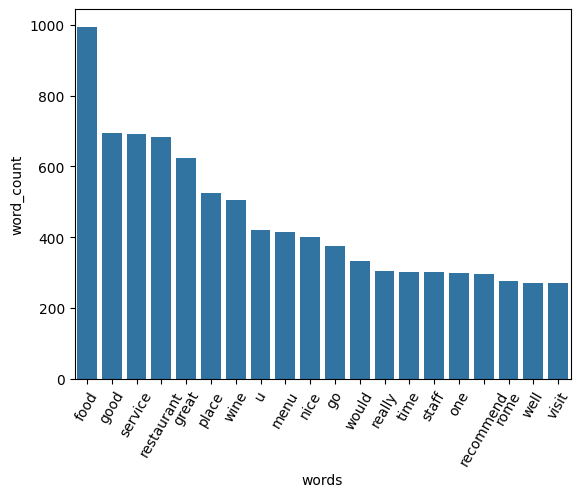

In [49]:
sns.barplot(x='words',y='word_count',data=review_topwords_lemmatized)
plt.xticks(rotation=60)

In [50]:
df3[['Review','Sentiment','Review_cleaned_lemmatized']].to_csv('cleaned_reviews.csv', index=False)

In [51]:
from nltk import ngrams

In [52]:
df4=pd.read_csv('cleaned_reviews.csv')

In [53]:
df4.head()

,Review,Sentiment,Review_cleaned_lemmatized
0,The manager became agressive when I said the c...,Negative,manager become agressive say carbonara good ru...
1,"I ordered a beef fillet ask to be done medium,...",Negative,order beef fillet ask do medium get well do co...
2,"This is an attractive venue with welcoming, al...",Negative,attractive venue welcome albeit somewhat slow ...
3,Sadly I used the high TripAdvisor rating too ...,Negative,sadly use high tripadvisor rating literally fo...
4,From the start this meal was bad- especially g...,Negative,start meal bad- especially give price visit hu...


# Tokenize data

In [54]:
df4['Review_tokenized']=df4['Review_cleaned_lemmatized'].apply(lambda x: word_tokenize(x))
df4.head()

,Review,Sentiment,Review_cleaned_lemmatized,Review_tokenized
0,The manager became agressive when I said the c...,Negative,manager become agressive say carbonara good ru...,"[manager, become, agressive, say, carbonara, g..."
1,"I ordered a beef fillet ask to be done medium,...",Negative,order beef fillet ask do medium get well do co...,"[order, beef, fillet, ask, do, medium, get, we..."
2,"This is an attractive venue with welcoming, al...",Negative,attractive venue welcome albeit somewhat slow ...,"[attractive, venue, welcome, albeit, somewhat,..."
3,Sadly I used the high TripAdvisor rating too ...,Negative,sadly use high tripadvisor rating literally fo...,"[sadly, use, high, tripadvisor, rating, litera..."
4,From the start this meal was bad- especially g...,Negative,start meal bad- especially give price visit hu...,"[start, meal, bad-, especially, give, price, v..."


# Extract Ngrams
n-grams = group of n words/characters together → used to capture patterns and context in language.

In [55]:
def extract_ngrams(tokenized_data,n):
    ngrams_list = list(nltk.ngrams(tokenized_data, n))
    ngrams_str = [' '.join(grams) for grams in ngrams_list]
    return ngrams_str

In [56]:
df4['Review_ngrams']=df4['Review_tokenized'].apply(lambda x: extract_ngrams(x,3))
df4.head()

,Review,Sentiment,Review_cleaned_lemmatized,Review_tokenized,Review_ngrams
0,The manager became agressive when I said the c...,Negative,manager become agressive say carbonara good ru...,"[manager, become, agressive, say, carbonara, g...","[manager become agressive, become agressive sa..."
1,"I ordered a beef fillet ask to be done medium,...",Negative,order beef fillet ask do medium get well do co...,"[order, beef, fillet, ask, do, medium, get, we...","[order beef fillet, beef fillet ask, fillet as..."
2,"This is an attractive venue with welcoming, al...",Negative,attractive venue welcome albeit somewhat slow ...,"[attractive, venue, welcome, albeit, somewhat,...","[attractive venue welcome, venue welcome albei..."
3,Sadly I used the high TripAdvisor rating too ...,Negative,sadly use high tripadvisor rating literally fo...,"[sadly, use, high, tripadvisor, rating, litera...","[sadly use high, use high tripadvisor, high tr..."
4,From the start this meal was bad- especially g...,Negative,start meal bad- especially give price visit hu...,"[start, meal, bad-, especially, give, price, v...","[start meal bad-, meal bad- especially, bad- e..."


# **Visualise most common ngrams**

In [57]:
def combine_words(word_list):
    all_words = []
    for word in word_list:
        all_words += word
    return all_words

In [58]:
def count_topwords(all_words):
    counts = dict()
    for word in all_words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    word_count = pd.DataFrame([counts])
    word_count_transposed = word_count.T.reset_index()
    word_count_transposed.columns = ['words','word_count']
    word_count_sorted = word_count_transposed.sort_values("word_count",ascending = False)
    word_count_sorted
    return word_count_sorted[:10]

In [59]:
reviews4=df4['Review_ngrams']
review_words4=combine_words(reviews4)
review_words4[:13]

['manager become agressive',
 'become agressive say',
 'agressive say carbonara',
 'say carbonara good',
 'carbonara good rude',
 'good rude bad',
 'rude bad experience',
 'bad experience bad',
 'experience bad rome',
 'bad rome many',
 'rome many year',
 'order beef fillet',
 'beef fillet ask']

In [60]:
reviews_top=count_topwords(review_words4)
reviews_top.head(10)

,words,word_count
18657,bottle olive oil,24
356,taste menu wine,24
11634,would highly recommend,19
355,truffle taste menu,18
916,visit ad hoc,18
11106,definitely come back,17
9859,food really good,13
10963,would definitely recommend,12
9999,make u feel,12
18724,small bottle olive,11


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'bottle olive oil'),
  Text(1, 0, 'taste menu wine'),
  Text(2, 0, 'would highly recommend'),
  Text(3, 0, 'truffle taste menu'),
  Text(4, 0, 'visit ad hoc'),
  Text(5, 0, 'definitely come back'),
  Text(6, 0, 'food really good'),
  Text(7, 0, 'would definitely recommend'),
  Text(8, 0, 'make u feel'),
  Text(9, 0, 'small bottle olive')])

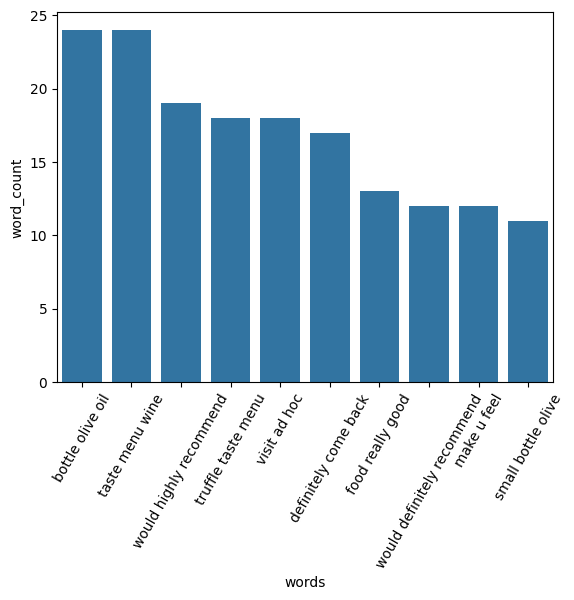

In [61]:
sns.barplot(x='words',y='word_count',data=reviews_top)
plt.xticks(rotation=60)

this bar plot is showing that taste menu wine is most commom phrase in reviews

In [62]:
from nltk.probability import FreqDist
from wordcloud import WordCloud

# Creating Word Clouds.

In [63]:
df4.head()

,Review,Sentiment,Review_cleaned_lemmatized,Review_tokenized,Review_ngrams
0,The manager became agressive when I said the c...,Negative,manager become agressive say carbonara good ru...,"[manager, become, agressive, say, carbonara, g...","[manager become agressive, become agressive sa..."
1,"I ordered a beef fillet ask to be done medium,...",Negative,order beef fillet ask do medium get well do co...,"[order, beef, fillet, ask, do, medium, get, we...","[order beef fillet, beef fillet ask, fillet as..."
2,"This is an attractive venue with welcoming, al...",Negative,attractive venue welcome albeit somewhat slow ...,"[attractive, venue, welcome, albeit, somewhat,...","[attractive venue welcome, venue welcome albei..."
3,Sadly I used the high TripAdvisor rating too ...,Negative,sadly use high tripadvisor rating literally fo...,"[sadly, use, high, tripadvisor, rating, litera...","[sadly use high, use high tripadvisor, high tr..."
4,From the start this meal was bad- especially g...,Negative,start meal bad- especially give price visit hu...,"[start, meal, bad-, especially, give, price, v...","[start meal bad-, meal bad- especially, bad- e..."


In [64]:
df4=df4.dropna()

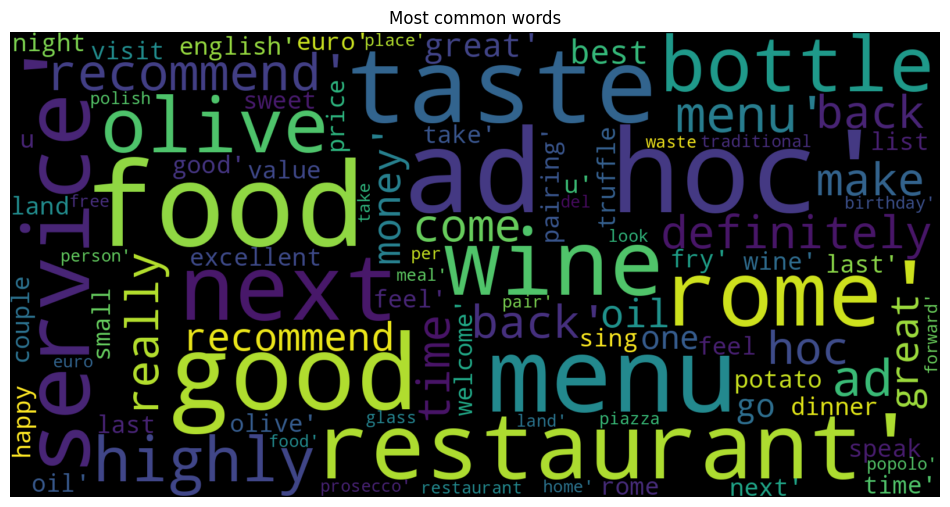

In [65]:
mostcommon=FreqDist(review_words4).most_common(50)
wordcloud=WordCloud(width=1600,height=800,max_font_size=200).generate(str(mostcommon))
fig=plt.figure(figsize=(12,8),facecolor='white')
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most common words')
plt.show()

# Checking Term Frequency
TF (Term Frequency): How often a word appears in a document.
Example: In review "The food was good and good", TF of "good" = 2.

IDF (Inverse Document Frequency): How rare the word is across all documents.
Rare words get higher weight, common words (like “the”, “is”) get lower weight.

TF-IDF = TF × IDF
→ This gives importance to words that are frequent in one review but not too common across all reviews.

So, TfidfVectorizer converts your text column into a numeric matrix, where each column is a word and each row is a review, with values representing TF-IDF scores.

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.probability import FreqDist
from wordcloud import WordCloud

In [67]:
vectorizer = TfidfVectorizer(use_idf=True)

tfIdf = vectorizer.fit_transform(df4['Review_cleaned_lemmatized'])


tfid_output = pd.DataFrame(tfIdf.toarray(), columns=vectorizer.get_feature_names_out())
print(tfid_output.head())


    00  00pm   01   08   10  100  10mins  10percent  10th   11  ...  zoubair  \
0  0.0   0.0  0.0  0.0  0.0  0.0     0.0        0.0   0.0  0.0  ...      0.0   
1  0.0   0.0  0.0  0.0  0.0  0.0     0.0        0.0   0.0  0.0  ...      0.0   
2  0.0   0.0  0.0  0.0  0.0  0.0     0.0        0.0   0.0  0.0  ...      0.0   
3  0.0   0.0  0.0  0.0  0.0  0.0     0.0        0.0   0.0  0.0  ...      0.0   
4  0.0   0.0  0.0  0.0  0.0  0.0     0.0        0.0   0.0  0.0  ...      0.0   

   zoubir  zucca  zucchini  zurek  çok  équipe  été  özellikle  śliwka  
0     0.0    0.0       0.0    0.0  0.0     0.0  0.0        0.0     0.0  
1     0.0    0.0       0.0    0.0  0.0     0.0  0.0        0.0     0.0  
2     0.0    0.0       0.0    0.0  0.0     0.0  0.0        0.0     0.0  
3     0.0    0.0       0.0    0.0  0.0     0.0  0.0        0.0     0.0  
4     0.0    0.0       0.0    0.0  0.0     0.0  0.0        0.0     0.0  

[5 rows x 5301 columns]


In [68]:
tfIdf_total = tfid_output.T.sum(axis=1)
tfIdf_total.sort_values(ascending = False)

,0
food,68.502786
great,62.184803
good,60.663649
service,59.112576
restaurant,49.226771
...,...
bizarre,0.063731
explore,0.063731
deliberate,0.063731
experimental,0.063731


In [69]:
tfid_output.iloc[0].nlargest(10)


,0
bad,0.499444
agressive,0.428306
become,0.315083
rude,0.315083
carbonara,0.278038
manager,0.265888
year,0.253349
say,0.211955
many,0.200625
experience,0.173606


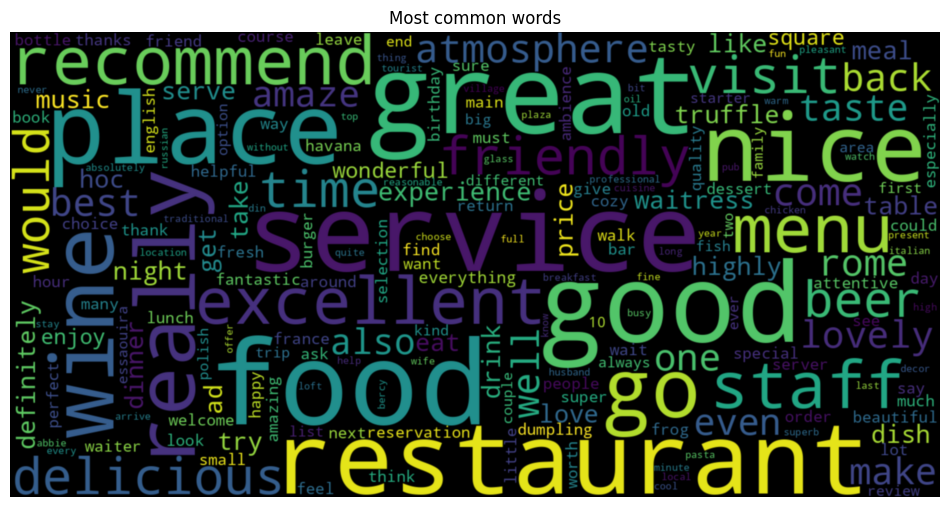

In [70]:
wordcloud2=WordCloud(width=1600,height=800,max_font_size=200).generate(str(tfid_output))
wordcloud2.generate_from_frequencies(tfIdf_total)
fig=plt.figure(figsize=(12,8),facecolor='white')
plt.imshow(wordcloud2,interpolation='bicubic')
plt.axis('off')
plt.title('Most common words')
plt.show()


## interpolation
it’s how Python “fills in the gaps” when resizing an image.

# Checking Sentiments

In [71]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# Concept:

VADER is a lexicon-based sentiment analyzer.

It assigns sentiment scores for negative, neutral, positive, and an overall compound score.

The vader_lexicon contains words with predefined sentiment intensities.

In [72]:
sentiment_analyzer = SentimentIntensityAnalyzer()
df4['Sentiment_score']=df4['Review_cleaned_lemmatized'].apply(lambda x: sentiment_analyzer.polarity_scores(x))
df4.head()

,Review,Sentiment,Review_cleaned_lemmatized,Review_tokenized,Review_ngrams,Sentiment_score
0,The manager became agressive when I said the c...,Negative,manager become agressive say carbonara good ru...,"[manager, become, agressive, say, carbonara, g...","[manager become agressive, become agressive sa...","{'neg': 0.457, 'neu': 0.411, 'pos': 0.132, 'co..."
1,"I ordered a beef fillet ask to be done medium,...",Negative,order beef fillet ask do medium get well do co...,"[order, beef, fillet, ask, do, medium, get, we...","[order beef fillet, beef fillet ask, fillet as...","{'neg': 0.198, 'neu': 0.735, 'pos': 0.067, 'co..."
2,"This is an attractive venue with welcoming, al...",Negative,attractive venue welcome albeit somewhat slow ...,"[attractive, venue, welcome, albeit, somewhat,...","[attractive venue welcome, venue welcome albei...","{'neg': 0.114, 'neu': 0.667, 'pos': 0.219, 'co..."
3,Sadly I used the high TripAdvisor rating too ...,Negative,sadly use high tripadvisor rating literally fo...,"[sadly, use, high, tripadvisor, rating, litera...","[sadly use high, use high tripadvisor, high tr...","{'neg': 0.118, 'neu': 0.53, 'pos': 0.352, 'com..."
4,From the start this meal was bad- especially g...,Negative,start meal bad- especially give price visit hu...,"[start, meal, bad-, especially, give, price, v...","[start meal bad-, meal bad- especially, bad- e...","{'neg': 0.139, 'neu': 0.735, 'pos': 0.127, 'co..."


Concept:

Each review is scored:

neg → negative proportion

neu → neutral proportion

pos → positive proportion

compound → overall sentiment (-1 to +1)


In [73]:
df4['Overall_scores']=df4['Sentiment_score'].apply(lambda x: x['compound'])
df4.head()

,Review,Sentiment,Review_cleaned_lemmatized,Review_tokenized,Review_ngrams,Sentiment_score,Overall_scores
0,The manager became agressive when I said the c...,Negative,manager become agressive say carbonara good ru...,"[manager, become, agressive, say, carbonara, g...","[manager become agressive, become agressive sa...","{'neg': 0.457, 'neu': 0.411, 'pos': 0.132, 'co...",-0.7964
1,"I ordered a beef fillet ask to be done medium,...",Negative,order beef fillet ask do medium get well do co...,"[order, beef, fillet, ask, do, medium, get, we...","[order beef fillet, beef fillet ask, fillet as...","{'neg': 0.198, 'neu': 0.735, 'pos': 0.067, 'co...",-0.4728
2,"This is an attractive venue with welcoming, al...",Negative,attractive venue welcome albeit somewhat slow ...,"[attractive, venue, welcome, albeit, somewhat,...","[attractive venue welcome, venue welcome albei...","{'neg': 0.114, 'neu': 0.667, 'pos': 0.219, 'co...",0.4268
3,Sadly I used the high TripAdvisor rating too ...,Negative,sadly use high tripadvisor rating literally fo...,"[sadly, use, high, tripadvisor, rating, litera...","[sadly use high, use high tripadvisor, high tr...","{'neg': 0.118, 'neu': 0.53, 'pos': 0.352, 'com...",0.9926
4,From the start this meal was bad- especially g...,Negative,start meal bad- especially give price visit hu...,"[start, meal, bad-, especially, give, price, v...","[start meal bad-, meal bad- especially, bad- e...","{'neg': 0.139, 'neu': 0.735, 'pos': 0.127, 'co...",-0.1829


In [74]:
df4['Sentiment_category']=df4['Overall_scores'].apply(lambda x: 'Positive' if x>0.5 else ('Negative' if x<0.5 else 'neutral'))
df4.head()

,Review,Sentiment,Review_cleaned_lemmatized,Review_tokenized,Review_ngrams,Sentiment_score,Overall_scores,Sentiment_category
0,The manager became agressive when I said the c...,Negative,manager become agressive say carbonara good ru...,"[manager, become, agressive, say, carbonara, g...","[manager become agressive, become agressive sa...","{'neg': 0.457, 'neu': 0.411, 'pos': 0.132, 'co...",-0.7964,Negative
1,"I ordered a beef fillet ask to be done medium,...",Negative,order beef fillet ask do medium get well do co...,"[order, beef, fillet, ask, do, medium, get, we...","[order beef fillet, beef fillet ask, fillet as...","{'neg': 0.198, 'neu': 0.735, 'pos': 0.067, 'co...",-0.4728,Negative
2,"This is an attractive venue with welcoming, al...",Negative,attractive venue welcome albeit somewhat slow ...,"[attractive, venue, welcome, albeit, somewhat,...","[attractive venue welcome, venue welcome albei...","{'neg': 0.114, 'neu': 0.667, 'pos': 0.219, 'co...",0.4268,Negative
3,Sadly I used the high TripAdvisor rating too ...,Negative,sadly use high tripadvisor rating literally fo...,"[sadly, use, high, tripadvisor, rating, litera...","[sadly use high, use high tripadvisor, high tr...","{'neg': 0.118, 'neu': 0.53, 'pos': 0.352, 'com...",0.9926,Positive
4,From the start this meal was bad- especially g...,Negative,start meal bad- especially give price visit hu...,"[start, meal, bad-, especially, give, price, v...","[start meal bad-, meal bad- especially, bad- e...","{'neg': 0.139, 'neu': 0.735, 'pos': 0.127, 'co...",-0.1829,Negative


In [75]:
pd.crosstab(df4['Sentiment'], df4['Sentiment_category'])


Sentiment_category,Negative,Positive
Sentiment,,
Negative,130,135
Positive,54,1183


Reading the table

130 → Reviews that were originally Negative and correctly predicted as Negative.

135 → Reviews that were originally Negative but incorrectly predicted as Positive.

54 → Reviews that were originally Positive but predicted as Negative.

1183 → Reviews that were originally Positive and correctly predicted as Positive.


In [76]:
df4['Match'] = df4['Sentiment'] == df4['Sentiment_category']
accuracy = df4['Match'].mean()
print("Accuracy:", accuracy)


Accuracy: 0.874167776298269


This is showing that 87% predicted sentiment are correct

# Visualise most common words with lemmatized data

In [77]:
review5=df4.loc[df4['Sentiment_category']=='Negative','Review_tokenized']
review_words5=combine_words(review5)
review_words5[:20]


['manager',
 'become',
 'agressive',
 'say',
 'carbonara',
 'good',
 'rude',
 'bad',
 'experience',
 'bad',
 'rome',
 'many',
 'year',
 'order',
 'beef',
 'fillet',
 'ask',
 'do',
 'medium',
 'get']

Words indicating negative sentiment:

agressive, rude, bad, experience → clearly express negative experiences.

order, beef, fillet, medium, carbonara → neutral/food-related, could indicate context.

Words that might reduce negative score:

good, get, many, year → these are positive or neutral words. For example, “good” can slightly increase the sentiment score even in a negative review, depending on VADER weighting.

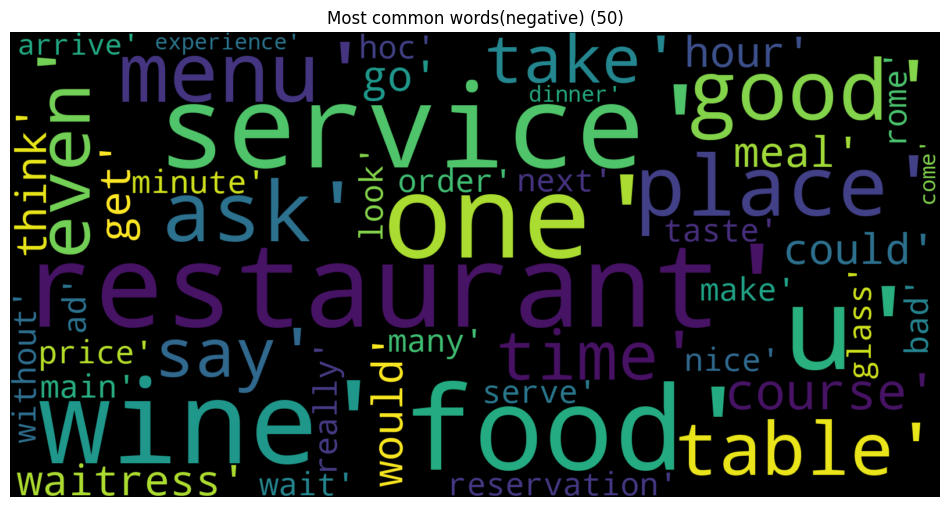

In [78]:
mostcommon5=FreqDist(review_words5).most_common(50)
wordcloud5=WordCloud(width=1600,height=800,max_font_size=200).generate(str(mostcommon5))
plt.figure(figsize=(12,8),facecolor='white')
plt.imshow(wordcloud5,interpolation='bilinear')
plt.axis('off')
plt.title('Most common words(negative) (50)')
plt.show()

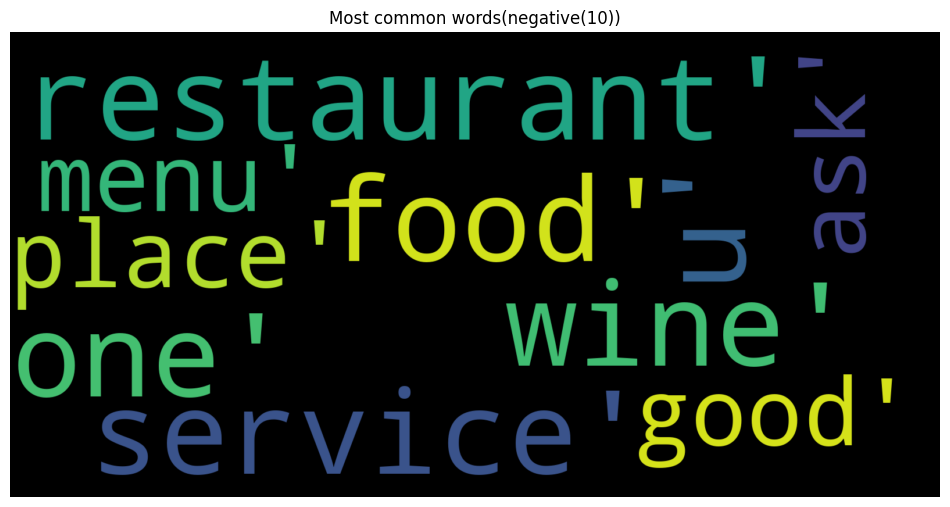

In [79]:
mostcommon5=FreqDist(review_words5).most_common(10)
wordcloud5=WordCloud(width=1600,height=800,max_font_size=200).generate(str(mostcommon5))
plt.figure(figsize=(12,8),facecolor='white')
plt.imshow(wordcloud5,interpolation='bilinear')
plt.axis('off')
plt.title('Most common words(negative(10))')
plt.show()

This graph is showing ten most commem words in bad reviews

# Performing Topic Modelling
simple_preprocess → clean and tokenize text.

corpora.Dictionary and doc2bow → convert tokens into numerical format for modeling.

gensim.models.LdaModel → train LDA for topic modeling.

pyLDAvis → visualize and interpret topics.

pprint → display results neatly.

In [82]:
!pip install gensim
import gensim
from gensim.utils import simple_preprocess
import gensim.corpora as corpora
from pprint import pprint
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()

In [83]:
df4.head()

,Review,Sentiment,Review_cleaned_lemmatized,Review_tokenized,Review_ngrams,Sentiment_score,Overall_scores,Sentiment_category,Match
0,The manager became agressive when I said the c...,Negative,manager become agressive say carbonara good ru...,"[manager, become, agressive, say, carbonara, g...","[manager become agressive, become agressive sa...","{'neg': 0.457, 'neu': 0.411, 'pos': 0.132, 'co...",-0.7964,Negative,True
1,"I ordered a beef fillet ask to be done medium,...",Negative,order beef fillet ask do medium get well do co...,"[order, beef, fillet, ask, do, medium, get, we...","[order beef fillet, beef fillet ask, fillet as...","{'neg': 0.198, 'neu': 0.735, 'pos': 0.067, 'co...",-0.4728,Negative,True
2,"This is an attractive venue with welcoming, al...",Negative,attractive venue welcome albeit somewhat slow ...,"[attractive, venue, welcome, albeit, somewhat,...","[attractive venue welcome, venue welcome albei...","{'neg': 0.114, 'neu': 0.667, 'pos': 0.219, 'co...",0.4268,Negative,True
3,Sadly I used the high TripAdvisor rating too ...,Negative,sadly use high tripadvisor rating literally fo...,"[sadly, use, high, tripadvisor, rating, litera...","[sadly use high, use high tripadvisor, high tr...","{'neg': 0.118, 'neu': 0.53, 'pos': 0.352, 'com...",0.9926,Positive,False
4,From the start this meal was bad- especially g...,Negative,start meal bad- especially give price visit hu...,"[start, meal, bad-, especially, give, price, v...","[start meal bad-, meal bad- especially, bad- e...","{'neg': 0.139, 'neu': 0.735, 'pos': 0.127, 'co...",-0.1829,Negative,True


In [84]:
data=df4['Review_tokenized'].values.tolist()
all=list(data)
all[:1][0][:30]

['manager',
 'become',
 'agressive',
 'say',
 'carbonara',
 'good',
 'rude',
 'bad',
 'experience',
 'bad',
 'rome',
 'many',
 'year']

 this step converts your tokenized column into a plain Python list and shows the first review’s first 30 tokens.

# Create dictionary and corpus to prepare data for LDA

In [85]:
dictionary=corpora.Dictionary(all)
corpus=[dictionary.doc2bow(words) for words in all]
print(corpus[:1][0][:30])

[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1)]


### **Step: Create Dictionary and Corpus**


### **1️Dictionary**

* `corpora.Dictionary(all)` creates a **mapping of all unique words in your dataset** to a unique ID.
* Example:

  * `'manager' → 0`
  * `'become' → 1`
  * `'agressive' → 2`
* This dictionary is necessary for converting text into numerical form for LDA.

### **2️ Corpus**

* `corpus = [dictionary.doc2bow(words) for words in all]` converts each document into a **bag-of-words (BoW) representation**.
* **Bag-of-words format:**

  * Each document is represented as a list of tuples: `(word_id, word_count)`
  * Example from your output:

    ```python
    [(0, 1), (1, 2), (2, 1), ...]
    ```

    * `0 → 1` means word with ID `0` appears **once** in the document.
    * `1 → 2` means word with ID `1` appears **twice**.



### **3️ Why this is done**

* LDA models require **numerical input**, not raw text.
* The dictionary and corpus prepare your text data in the **format that Gensim LDA model understands**.
* Each document is now a set of `(word_id, frequency)` tuples ready for topic modeling.




# Building LDA model
 What is LDA (Latent Dirichlet Allocation)?

LDA is a topic modeling technique.

It assumes that:

Each document is a mixture of topics.

Each topic is a mixture of words.

Goal: Automatically discover hidden topics in a collection of documents based on word distributions.

Example:

Document: "The pizza was great but service was slow"

LDA might assign 70% of the words to a “Food” topic and 30% to a “Service” topic.

Topic 1 words: pizza, pasta, burger

Topic 2 words: service, wait, staff

How the dictionary & corpus fit in

Dictionary: Maps words → unique IDs (like a vocabulary).

Corpus: Represents documents as Bag-of-Words vectors: (word_id, frequency)

LDA uses this to compute probabilities:

Probability of a word belonging to a topic.

Probability of a topic appearing in a document.

In [86]:
lda_model = gensim.models.LdaModel(
    corpus=corpus,          # Bag-of-Words corpus
    id2word=dictionary,     # Word ID mapping
    num_topics=5,           # Number of topics to extract
    random_state=100,       # For reproducibility
    update_every=1,
    passes=10,              # Number of iterations over the corpus
    alpha='auto',
    per_word_topics=True
)

In [87]:
pprint(lda_model.print_topics()[:4])

[(0,
  '0.032*"food" + 0.021*"good" + 0.018*"service" + 0.016*"great" + '
  '0.011*"excellent" + 0.008*"delicious" + 0.008*"restaurant" + 0.008*"staff" '
  '+ 0.007*"friendly" + 0.006*"beer"'),
 (1,
  '0.021*"great" + 0.015*"good" + 0.014*"food" + 0.014*"service" + '
  '0.013*"beer" + 0.010*"place" + 0.010*"really" + 0.009*"u" + 0.009*"time" + '
  '0.008*"go"'),
 (2,
  '0.013*"food" + 0.013*"good" + 0.013*"place" + 0.010*"restaurant" + '
  '0.008*"``" + 0.008*"nice" + 0.008*"go" + 0.007*"service" + 0.007*"try" + '
  '0.007*"great"'),
 (3,
  '0.021*"food" + 0.020*"wine" + 0.015*"restaurant" + 0.014*"menu" + '
  '0.013*"service" + 0.011*"u" + 0.010*"rome" + 0.009*"good" + 0.008*"place" + '
  '0.008*"great"')]


Topic 0: mostly about food quality and service (food, good, service, great, excellent)

Topic 1: also about overall experience and drinks (great, good, food, service, beer)

Topic 2: more about restaurants and places (food, good, place, restaurant, nice)

Topic 3: combines food, wine, menu, service, location (food, wine, restaurant, menu, service, rome)

# Visualize

In [88]:
lda_visuals = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_visuals)

# Intertopic Distance Map

What it is: The big plot on the left with circles (topics) spread out on a 2D plane.

Each circle = a topic in LDA model.

Distance between circles: Shows how different topics are from each other.

Far apart → topics share fewer words → very distinct.

Close together → topics share many words → similar topics.

Circle size: Represents how common the topic is in your dataset (larger = more documents contain this topic).

Why it’s useful: You can quickly see if topics are overlapping or very separate. Overlapping topics may need more refinement...like here 1 2 and 4 are overlapping
# Marginal Topic Distribution

What it is: Usually a small bar chart showing the proportion of each topic across all documents.

Each bar = a topic, and the height = how much this topic occurs in the dataset.

Why it’s useful: Helps you see which topics dominate your data. For example, if Topic 0 covers 50% of all reviews, it’s a very common theme.

# 3️ Top-30 Most Salient Terms

What it is: The list of words on the right side showing important words for the selected topic.

Salient words: Words that are both frequent and distinctive to that topic.

Relevance metric (λ):

λ = 1 → words are ranked by frequency only (common words).

λ = 0 → words are ranked by distinctiveness to the topic (unique words).

Sliding λ between 0 and 1 balances between common words vs. topic-specific words.

Why it’s useful: These words define what the topic is “about.” For example, Topic 0 might have words like food, service, staff, so it clearly represents restaurant experience.

# 4️ Estimated Term Frequency

What it is: Horizontal bars showing how often each word appears:

In the whole dataset

Within the selected topic

Longer bars: The word appears more often.

Why it’s useful: You can see which words are heavily associated with the topic and compare them to overall word frequency.

# Slide to Adjust Relevance (λ)

What it does: Lets you control which words are considered important for the topic.

How it works:

Move towards 1 → focus on common words across the dataset.

Move towards 0 → focus on unique words that differentiate this topic from others.

Why it’s useful: Makes it easier to label topics meaningfully. For example, “food” may be common in all reviews, but “carbonara” might be specific to a topic about Italian dishes.

# Add model results to original dataframe

In [95]:
data_reviewd = []

for i in range(len(df4)):
    topic_dist = lda_model.get_document_topics(corpus[i], minimum_probability=0)  # ensure all topics included
    if topic_dist:  # check if non-empty
        main_topic = max(topic_dist, key=lambda x: x[1])[0]  # pick topic with highest probability
    else:
        main_topic = -1  # placeholder if no topic
    data_reviewd.append(main_topic)

df4['Data_reviewd'] = data_reviewd
df4[['Review', 'Data_reviewd']].head()


,Review,Data_reviewd
0,The manager became agressive when I said the c...,4
1,"I ordered a beef fillet ask to be done medium,...",2
2,"This is an attractive venue with welcoming, al...",4
3,Sadly I used the high TripAdvisor rating too ...,3
4,From the start this meal was bad- especially g...,4


This table is showing the main topic assigned to each review by your LDA model:

Review → The text of the customer review.

Data_reviewd → The topic number (0, 1, 2, …) that has the highest probability for that review.

For example:

"The manager became aggressive …" → assigned to Topic 4. This means the LDA model thinks the words in this review most strongly belong to Topic 4.

"I ordered a beef fillet …" → assigned to Topic 2, so the review's content is most representative of Topic 2.

"This is an attractive venue …" → assigned to Topic 4, again showing its words match Topic 4 the most.

In [96]:
#showing how much words are included in each topic
df4['Data_reviewd'].value_counts()

,count
Data_reviewd,
3,476
1,322
2,277
4,214
0,213


Topics with higher counts are discussed more often by reviewers.

This shows general importance/popularity of topics, but doesn’t yet distinguish between positive or negative reviews.

In [97]:
# Check your sentiment distribution
df4['Sentiment_category'].value_counts()


,count
Sentiment_category,
Positive,1318
Negative,184


In [98]:
# Create a crosstab: counts of each topic per sentiment
topic_sentiment_counts = pd.crosstab(df4['Data_reviewd'], df4['Sentiment_category'])
topic_sentiment_counts


Sentiment_category,Negative,Positive
Data_reviewd,,
0,16,197
1,22,300
2,53,224
3,42,434
4,51,163


## Choosing Optimal number of Topics

In [99]:
from gensim.models import CoherenceModel

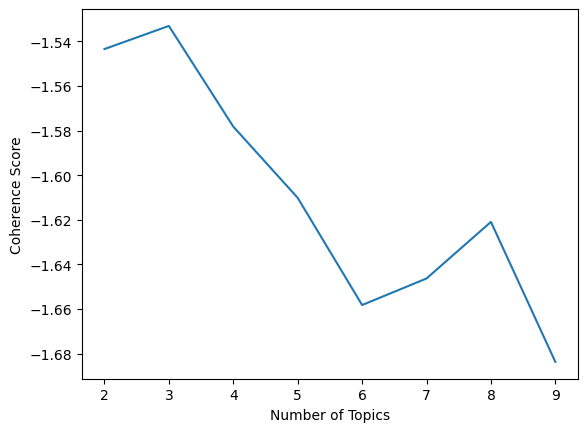

In [100]:
review_topics_um = []
coherence_scores_um = []
for i in range(2,10,1):
    lda_model_um = gensim.models.LdaMulticore(corpus=corpus, id2word=dictionary,num_topics = i ,random_state=1)
    coherence_um = CoherenceModel(model=lda_model_um, corpus=corpus, dictionary=dictionary, coherence='u_mass')
    review_topics_um.append(i)
    coherence_scores_um.append(coherence_um.get_coherence())
plt.plot(review_topics_um, coherence_scores_um)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.show()

# u_mass Coherence

This method looks at word co-occurrence patterns in the dataset.

It focuses on statistical relationships between words, without considering human interpretability.

Using u_mass, the coherence score was highest for 3 topics, suggesting that the reviews can be divided into three statistically distinct clusters of words.

These topics capture subtle differences in the text, though some may be hard to interpret.

In [101]:
topics_range = range(2,10,1)
max_index = coherence_scores_um.index(max(coherence_scores_um))
optimal_num_topics = topics_range[max_index]
print("Optimal topics: ",optimal_num_topics)

Optimal topics:  3


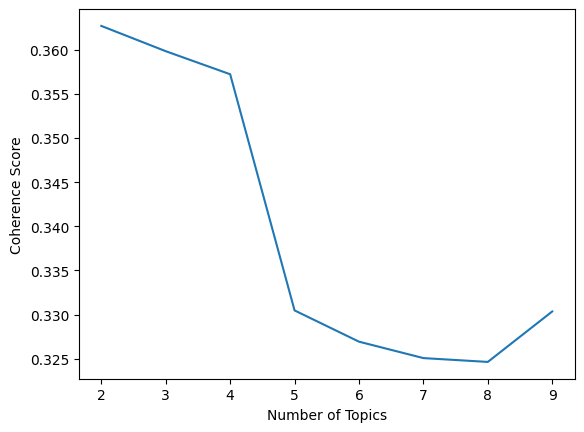

In [104]:
review_topics_cv = []
coherence_scores_cv = []
for i in range(2,10,1):
    lda_model_cv = gensim.models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=i, random_state=1)
    coherence_cv = CoherenceModel(model=lda_model_cv, texts = df4['Review_tokenized'], corpus=corpus, dictionary=dictionary, coherence='c_v')
    review_topics_cv.append(i)
    coherence_scores_cv.append(coherence_cv.get_coherence())
plt.plot(review_topics_cv, coherence_scores_cv)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.show()

# c_v Coherence

This method considers semantic similarity and human interpretability.

It evaluates how meaningful the topics are from a reader’s perspective.

Using c_v, the coherence score was highest for 2 topics, indicating that two broad, human-readable themes best summarize the reviews.

This often aligns better with intuitive categories like Positive vs. Negative sentiment.



In [105]:
topics_range = range(2,10,1)
max_index = coherence_scores_cv.index(max(coherence_scores_cv))
optimal_num_topics = topics_range[max_index]
print("Optimal topics: ",optimal_num_topics)

Optimal topics:  2
